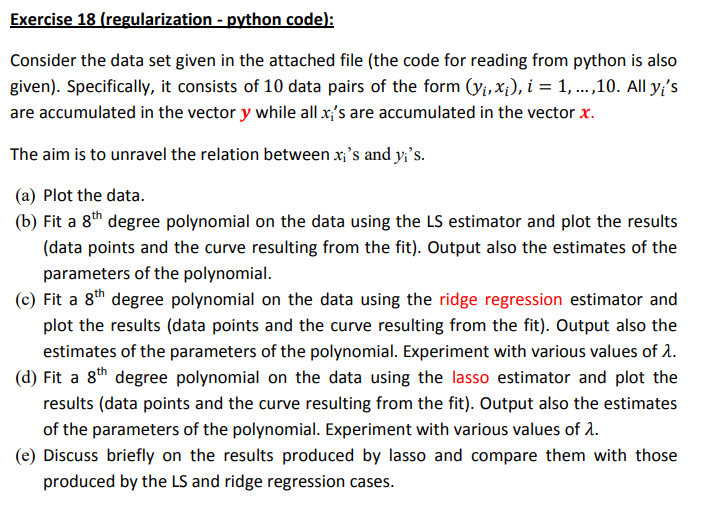

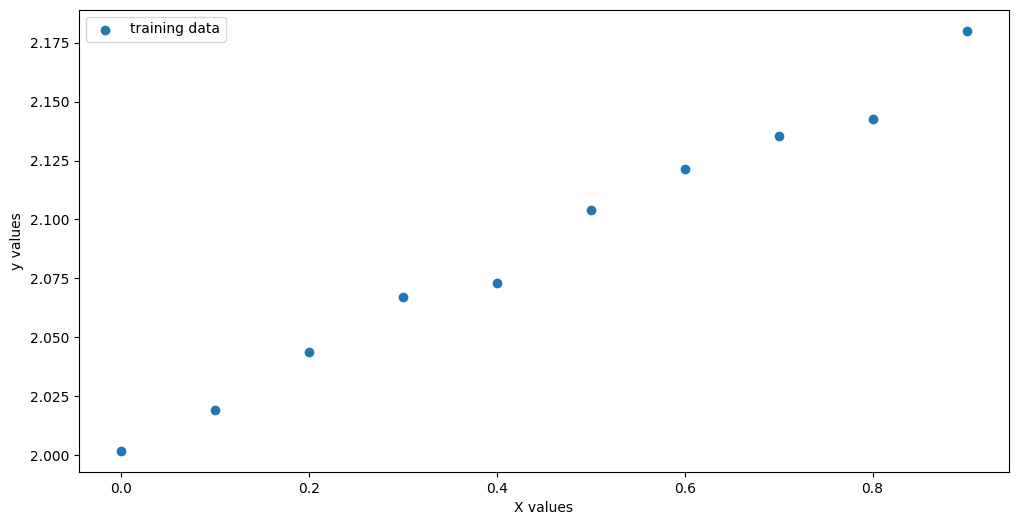

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn


Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']
#Plot 
plt.figure(figsize=(12, 6))  
plt.scatter(X, y, label='training data')
plt.xlabel('X values')  # Optional: Add x-axis label
plt.ylabel('y values')  # Optional: Add y-axis label
plt.legend()
plt.show()


## (b) Fit a 8th degree polynomial on the data using the LS estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial.

In [2]:
# Load data
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X'].flatten()  # Ensure X is a 1D array
y = Training_Set['y'].flatten()  # Ensure y is a 1D array

#  matrix manually for an 8th-degree polynomial
degree = 8
n = len(X)
X_design = np.zeros((n, degree + 1))

for i in range(degree + 1):
    X_design[:, i] = X ** i  # Fill each column with X raised to the ith power

# polynomial coefficients using the normal equation
coefficients = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

# polynomial fit line
x_fit = np.linspace(min(X), max(X), 1000)
y_fit = sum(coefficients[i] * x_fit ** i for i in range(degree + 1))

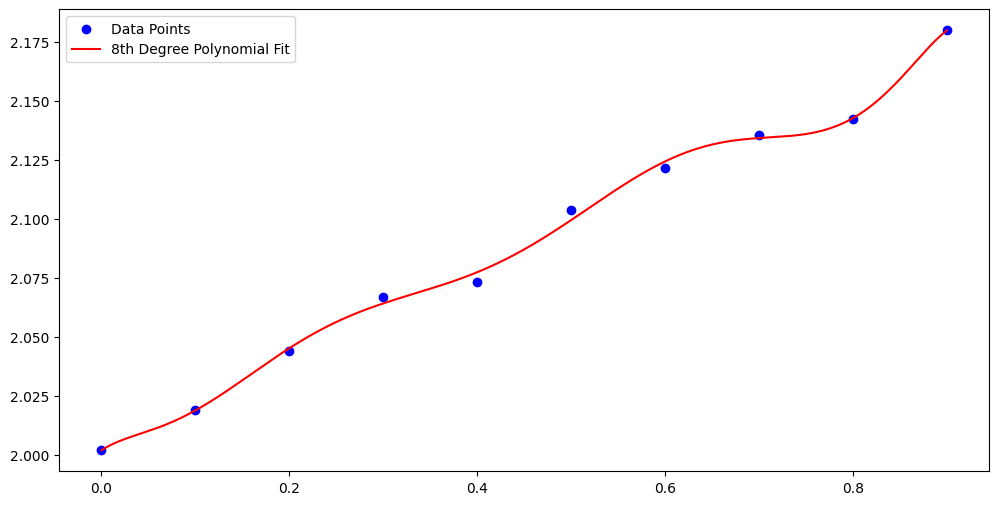

Polynomial coefficients (from constant term to highest degree):
[ 2.00198649e+00  2.59415131e-01 -3.83250479e+00  4.94210227e+01
 -2.62209216e+02  6.98309881e+02 -9.86598010e+02  7.06148417e+02
 -2.01452196e+02]


In [3]:
# Plot data points and fitted polynomial curve
plt.figure(figsize=(12, 6))  
plt.scatter(X, y, label='Data Points', color='blue', marker='o')
plt.plot(x_fit, y_fit, label=f'{degree}th Degree Polynomial Fit', color='red')
plt.legend()
plt.show()

# Output polynomial parameters
print("Polynomial coefficients (from constant term to highest degree):")
print(coefficients)

## (c) Fit a 8th degree polynomial on the data using the ridge regression estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial. Experiment with various values of 𝜆.


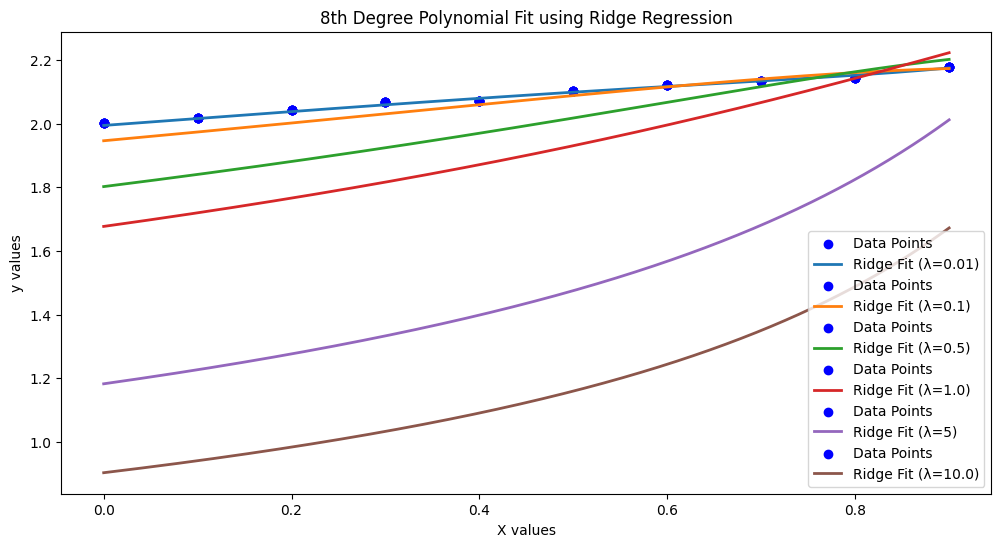

Polynomial coefficients for λ=0.01:
[ 1.99471461  0.21909439  0.00406036 -0.03389617 -0.02809453 -0.01125288
  0.00688224  0.02298818  0.03599   ]
Polynomial coefficients for λ=0.1:
[ 1.94657363  0.27166295  0.04077954 -0.01282617 -0.02248477 -0.02009638
 -0.0147972  -0.00943891 -0.00487436]
Polynomial coefficients for λ=0.5:
[ 1.8024133   0.3714051   0.11204427  0.02721759 -0.00480358 -0.01729449
 -0.02164996 -0.02240455 -0.02154775]
Polynomial coefficients for λ=1.0:
[ 1.6771831   0.41167511  0.15549847  0.06257238  0.02254727  0.00368133
 -0.00552871 -0.00995018 -0.0118701 ]
Polynomial coefficients for λ=5:
[1.18222158 0.41850661 0.22616662 0.14174991 0.09694072 0.07020591
 0.05295344 0.04117141 0.03277152]
Polynomial coefficients for λ=10.0:
[0.9026125  0.35527217 0.20706347 0.13826342 0.09978578 0.07569215
 0.05943095 0.04785359 0.03927451]


In [4]:
#  matrix for an 8th-degree polynomial
degree = 8
n = len(X)
X_design_ridge = np.zeros((n, degree + 1))

for i in range(degree + 1):
    X_design_ridge[:, i] = X ** i  # Filling each column with X raised to the ith power
# Define the Ridge regression function
def ridge_regression(X, y, lambda_):
    n = X.shape[1]
    I = np.eye(n)  # Identity matrix
    coefficients = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    return coefficients
plt.figure(figsize=(12, 6))  

# Defining different values of λ
lambdas = [0.01,0.1,0.5, 1.0, 5, 10.0]  
for lambda_ in lambdas:
    # Compute polynomial coefficients using Ridge regression
    coefficients = ridge_regression(X_design_ridge, y, lambda_)
    
    # Generate polynomial fit line
    x_fit = np.linspace(min(X), max(X), 1000)
    y_fit = sum(coefficients[i] * x_fit ** i for i in range(degree + 1))
    
    # Plot data points and fitted polynomial curve
    plt.scatter(X, y, label='Data Points', color='blue', marker='o')
    plt.plot(x_fit, y_fit, label=f'Ridge Fit (λ={lambda_})', linewidth=2)
    
# Customize plot
plt.legend()
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('8th Degree Polynomial Fit using Ridge Regression')
plt.show()

# Output polynomial parameters for each lambda
for lambda_ in lambdas:
    coefficients = ridge_regression(X_design_ridge, y, lambda_)
    print(f"Polynomial coefficients for λ={lambda_}:")
    print(coefficients)

For lower lambda we have better fitting 

## (d) Fit a 8th degree polynomial on the data using the lasso estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial. Experiment with various values of 𝜆.

C:\Users\steli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.678e-05, tolerance: 2.981e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\steli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.340e-05, tolerance: 2.981e-06
  model = cd_fast.enet_coordinate_descent(


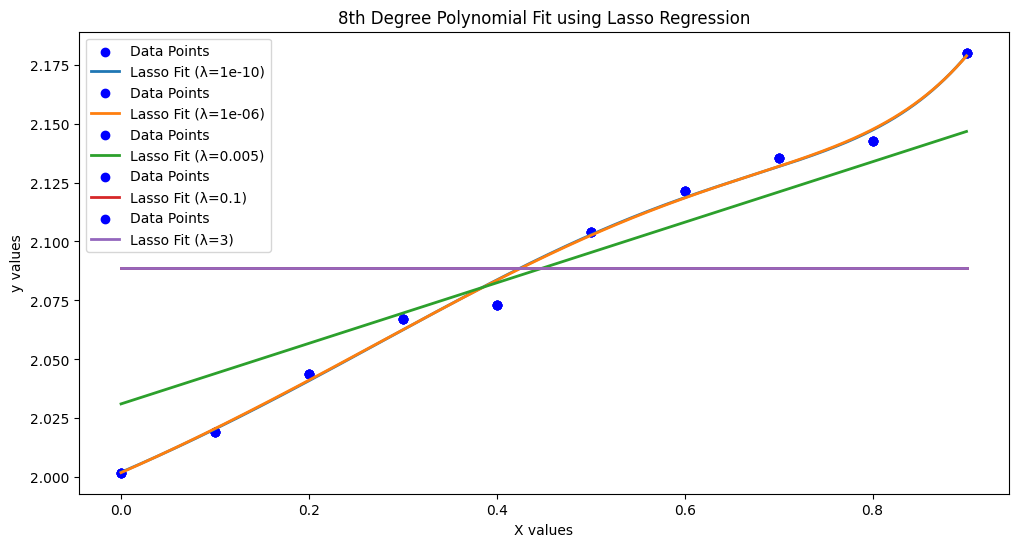

Polynomial coefficients for λ=1e-10 (from constant term to highest degree):
[ 0.          0.16995658  0.14098216 -0.07624334 -0.12936744 -0.09749301
 -0.01729305  0.08160893  0.18043564]
Polynomial coefficients for λ=1e-06 (from constant term to highest degree):
[ 0.          0.17547491  0.11999218 -0.06109269 -0.12454477 -0.08486763
 -0.01077142  0.03825068  0.19828017]
Polynomial coefficients for λ=0.005 (from constant term to highest degree):
[0.        0.1283484 0.        0.        0.        0.        0.
 0.        0.       ]
Polynomial coefficients for λ=0.1 (from constant term to highest degree):
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Polynomial coefficients for λ=3 (from constant term to highest degree):
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\steli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.678e-05, tolerance: 2.981e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\steli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.340e-05, tolerance: 2.981e-06
  model = cd_fast.enet_coordinate_descent(


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.linear_model import Lasso

# Load data
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X'].flatten()  # Ensure X is a 1D array
y = Training_Set['y'].flatten()  # Ensure y is a 1D array

degree = 8
n = len(X)
X_design_lasso = np.zeros((n, degree + 1))

for i in range(degree + 1):
    X_design_lasso[:, i] = X ** i  

# Experiment with different values of λ
lambdas = [1e-10,1e-06,5e-03,0.1,3]  

plt.figure(figsize=(12, 6))  

for lambda_ in lambdas:
    # Fit the Lasso regression model
    model = Lasso(alpha=lambda_)
    model.fit(X_design_lasso, y)
    
    # Generate polynomial fit line
    x_fit = np.linspace(min(X), max(X), 1000)
    X_fit_design = np.zeros((len(x_fit), degree + 1))
    
    for i in range(degree + 1):
        X_fit_design[:, i] = x_fit ** i  # Create the design matrix for x_fit

    y_fit = model.predict(X_fit_design)  # Predict using the Lasso model

    # Plot data points and fitted polynomial curve
    plt.scatter(X, y, label='Data Points', color='blue', marker='o')
    plt.plot(x_fit, y_fit, label=f'Lasso Fit (λ={lambda_})', linewidth=2)

# Customize plot
plt.legend()
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('8th Degree Polynomial Fit using Lasso Regression')
plt.show()

# Output polynomial parameters for each lambda
for lambda_ in lambdas:
    model = Lasso(alpha=lambda_)
    model.fit(X_design_lasso, y)
    print(f"Polynomial coefficients for λ={lambda_} (from constant term to highest degree):")
    print(model.coef_)


## (e) Discuss briefly on the results produced by lasso and compare them with those produced by the LS and ridge regression cases. 

In Lasso, we can notice many coefficients being set to zero, indicating feature selection. In contrast, Ridge will show all coefficients with reduced magnitudes, while LS  retains all original coefficients. Lasso and Ridge can generalize to new data , while LS be overfitted.

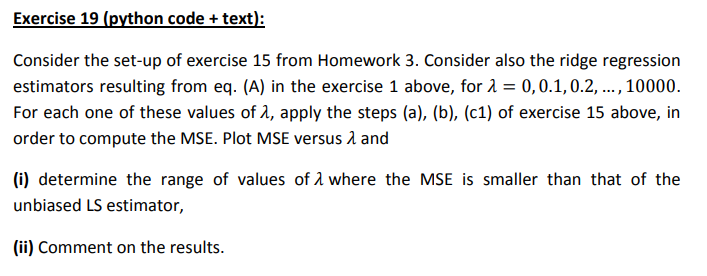

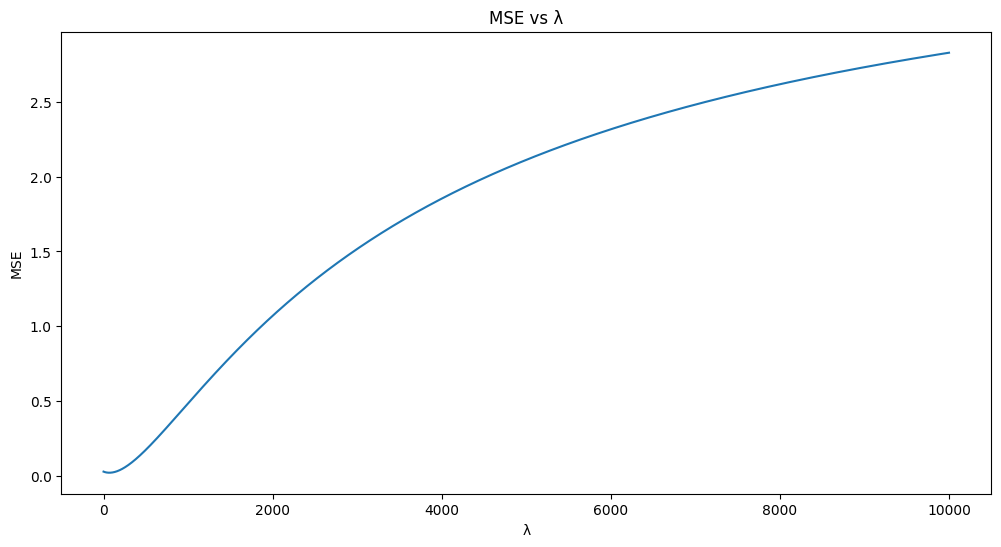

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 0
sigma = 8
N = 30
theta = 2
num_datasets = 50

# Generate a single set of datasets
X, Y = [], []
for _ in range(num_datasets):
    x = np.random.normal(mean, sigma, N)
    y = theta * x + np.random.normal(0, np.sqrt(64), N)
    X.append(x)
    Y.append(y)

X = np.array(X).T
Y = np.array(Y).T

# Estimation of theta for different lambda values
Theta_est0_lambda = []
lambda_values = np.arange(0.0, 10000.0, 0.1)

for lamda in lambda_values:
    Theta_est = []
    for i in range(num_datasets):
        arr_ones = np.ones(len(X))
        X_new = np.column_stack((arr_ones, X[:, i]))
        XTXinv = np.linalg.inv(np.dot(X_new.T, X_new) + lamda * np.identity(2))
        theta_est = np.dot(XTXinv, X_new.T).dot(Y[:, i])
        Theta_est.append(theta_est[1])
    Theta_est0_lambda.append(Theta_est)

# Calculate MSE
MSE_lambda = []
for theta_est in Theta_est0_lambda:
    MSE = np.mean((np.array(theta_est) - theta) ** 2)
    MSE_lambda.append(MSE)

# Plotting MSE
plt.figure(figsize=(12, 6))  
plt.plot(lambda_values, MSE_lambda)
plt.title('MSE vs λ')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()


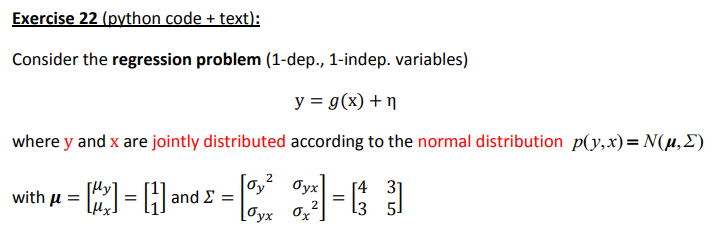
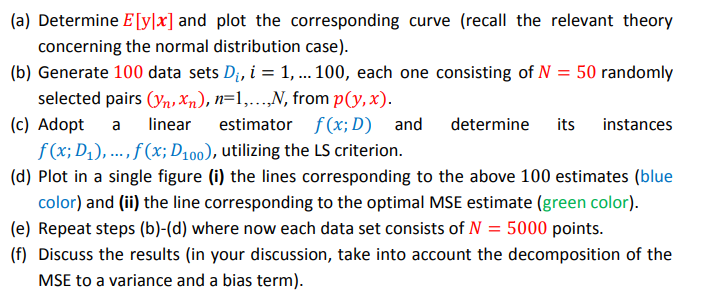

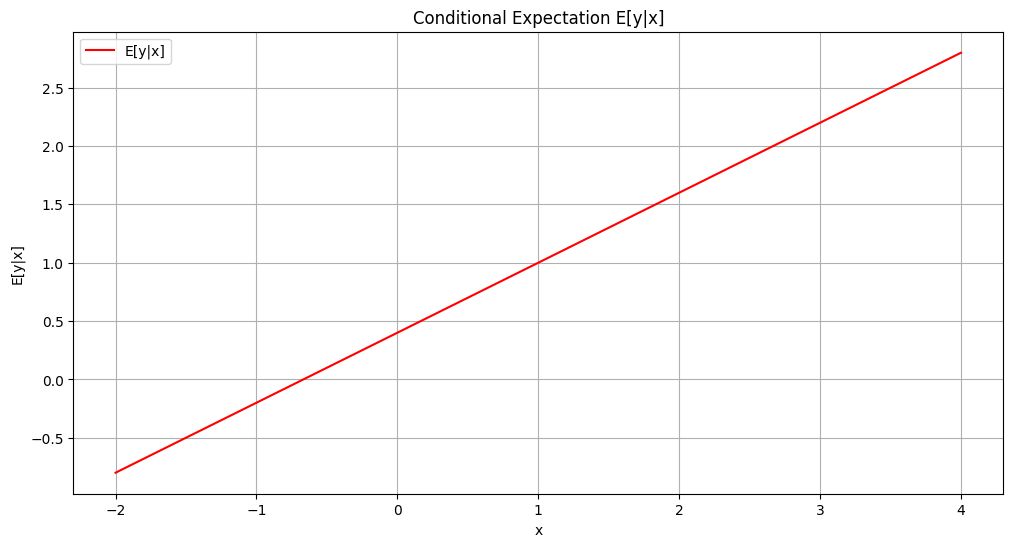

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
mu = np.array([1, 1])
sigma = np.array([[4, 3], [3, 5]])
N_50 = 50
N_5000 = 5000
num_datasets = 100

# (a) E[y|x] and plot the corresponding curve
def conditional_expectation(x):
    mu_y_x = mu[0] + sigma[0, 1] / sigma[1, 1] * (x - mu[1])
    return mu_y_x

x_values = np.linspace(-2, 4, 100)
y_values = conditional_expectation(x_values)

plt.figure(figsize=(12, 6))  
plt.plot(x_values, y_values, label='E[y|x]', color='red')
plt.title("Conditional Expectation E[y|x]")
plt.xlabel("x")
plt.ylabel("E[y|x]")
plt.grid()
plt.legend()
plt.show()

In [3]:
# (b) Generate 100 datasets D_i each consisting of N=50 pairs (y_n, x_n)
datasets_50 = []
for _ in range(num_datasets):
    data = np.random.multivariate_normal(mu, sigma, N_50)
    datasets_50.append(data)

In [4]:
# (c) Linear estimator f(x; D) using LS criterion
def linear_estimator(data):
    x = data[:, 1]
    y = data[:, 0]
    X = np.vstack([np.ones(len(x)), x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return beta_hat

estimators_50 = [linear_estimator(data) for data in datasets_50]

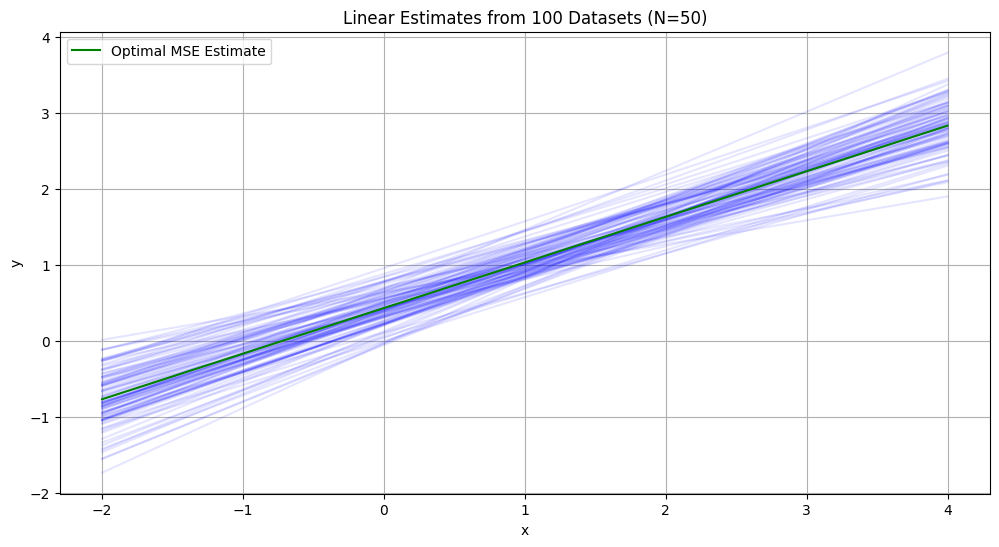

In [5]:
# (d) Plot the estimates and optimal MSE estimate
plt.figure(figsize=(12, 6))  
for beta_hat in estimators_50:
    x_fit = np.linspace(-2, 4, 100)
    y_fit = beta_hat[0] + beta_hat[1] * x_fit
    plt.plot(x_fit, y_fit, color='blue', alpha=0.1)

# Optimal MSE estimate
beta_optimal = linear_estimator(np.vstack(datasets_50))
x_fit = np.linspace(-2, 4, 100)
y_fit_optimal = beta_optimal[0] + beta_optimal[1] * x_fit
plt.plot(x_fit, y_fit_optimal, color='green', label='Optimal MSE Estimate')
plt.title("Linear Estimates from 100 Datasets (N=50)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

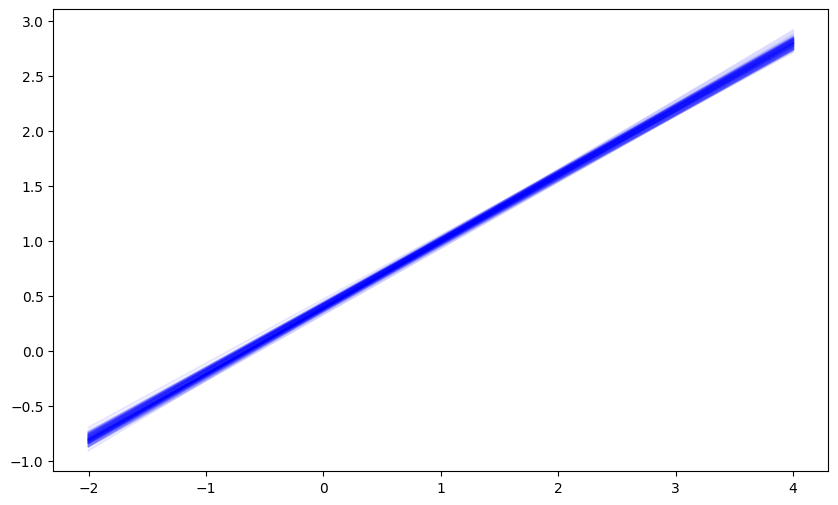

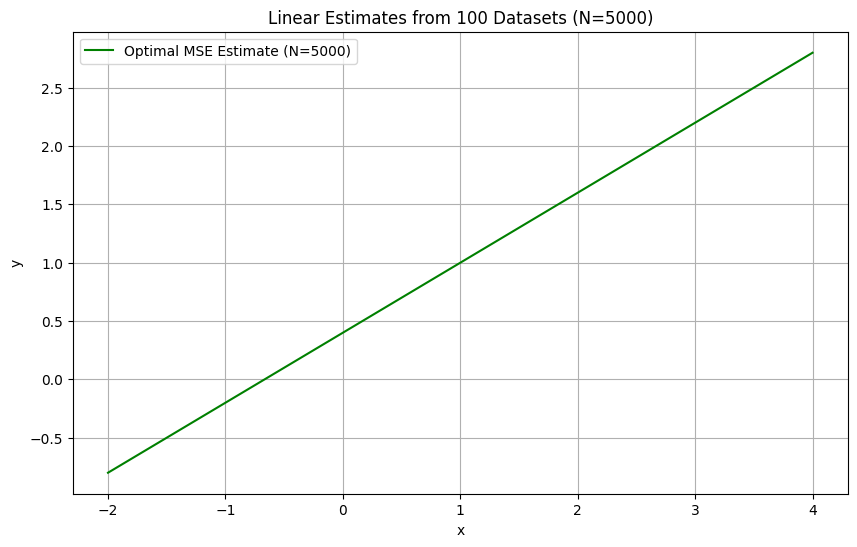

In [7]:
# (e) Repeat steps (b)-(d) for N=5000 points
datasets_5000 = []
for _ in range(num_datasets):
    data = np.random.multivariate_normal(mu, sigma, N_5000)
    datasets_5000.append(data)

estimators_5000 = [linear_estimator(data) for data in datasets_5000]

# Plotting for N=5000
plt.figure(figsize=(10, 6))
for beta_hat in estimators_5000:
    x_fit = np.linspace(-2, 4, 100)
    y_fit = beta_hat[0] + beta_hat[1] * x_fit
    plt.plot(x_fit, y_fit, color='blue', alpha=0.1)

# Optimal MSE estimate
beta_optimal_5000 = linear_estimator(np.vstack(datasets_5000))
x_fit = np.linspace(-2, 4, 100)
y_fit_optimal_5000 = beta_optimal_5000[0] + beta_optimal_5000[1] * x_fit
plt.figure(figsize=(10, 6))  
plt.plot(x_fit, y_fit_optimal_5000, color='green', label='Optimal MSE Estimate (N=5000)')
plt.title("Linear Estimates from 100 Datasets (N=5000)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()




The figures illustrate that increasing the sample size N from 50 to 5000 leads to a notable reduction in the variance of the estimator. Additionally, since the model for f(.) aligns with that of the optimal regressor, the term $(E[f(x; D)] - E[y|x])^2$ also decreases.



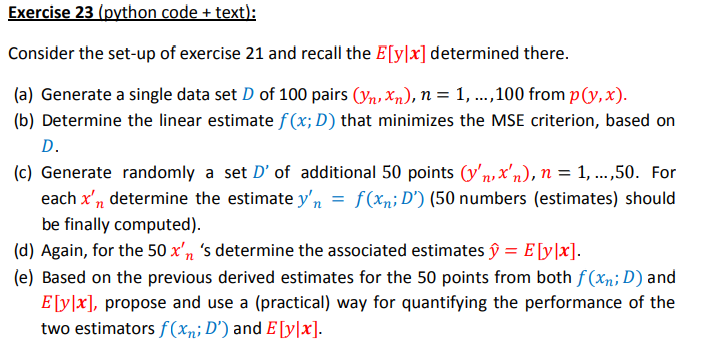

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Step (a): Generate a single dataset D of 100 pairs (y_n, x_n)
def generate_data(num_samples):
    x = np.random.uniform(0, 1, num_samples)  # Uniform distribution for x
    y = np.random.uniform(x**3, 1, num_samples)  # y in (x^3, 1)
    return x, y

# Generate dataset D
D_x, D_y = generate_data(100)

In [13]:
# Step (b): Determine the linear estimate f(x;D) that minimizes MSE
A = np.vstack([D_x, np.ones(len(D_x))]).T  # Design matrix for linear regression
m, c = np.linalg.lstsq(A, D_y, rcond=None)[0]  # Linear regression coefficients

# Define the linear estimate function
def linear_estimate(x):
    return m * x + c

In [14]:
# Step (c): Generate randomly a set D’ of additional 50 points
D_prime_x = np.random.uniform(0, 1, 50)
D_prime_y = np.random.uniform(D_prime_x**3, 1, 50)

# Compute estimates for D’ using the linear model
D_prime_estimates = linear_estimate(D_prime_x)

In [15]:
# Step (d): Calculate associated estimates ŷ = E[y|x]
def expected_value_y_given_x(x):
    return (1 + x**3) / 2

# Compute E[y|x] for D’ x values
E_y_given_x = expected_value_y_given_x(D_prime_x)

MSE for Linear Estimate: 0.059488868120379686
MSE for Expected Value Estimate: 0.041930267349554275


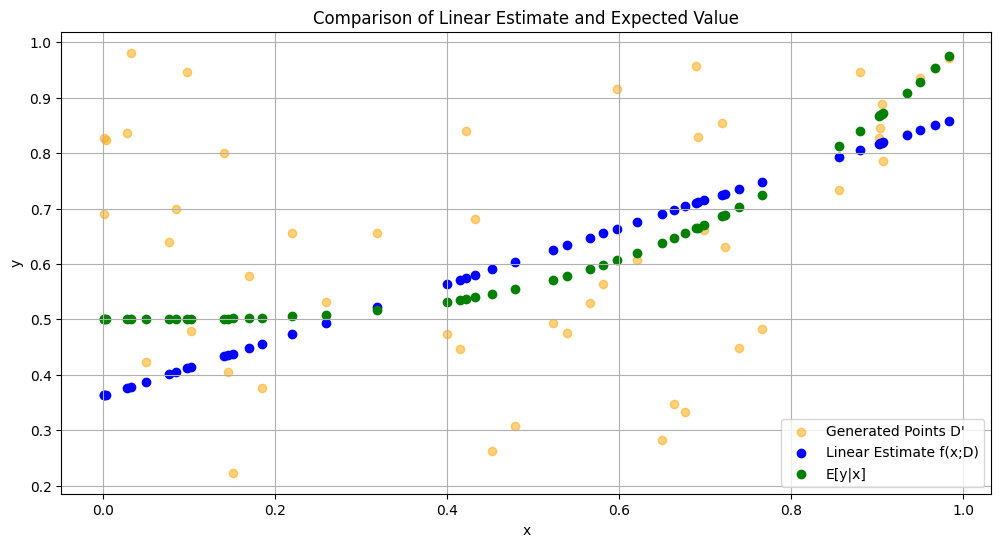

In [16]:
# Step (e): Quantify the performance using MSE
mse_linear = np.mean((D_prime_y - D_prime_estimates) ** 2)
mse_expected = np.mean((D_prime_y - E_y_given_x) ** 2)

# Output MSE results
print(f'MSE for Linear Estimate: {mse_linear}')
print(f'MSE for Expected Value Estimate: {mse_expected}')

# Plotting results
plt.figure(figsize=(12, 6))  
plt.scatter(D_prime_x, D_prime_y, label="Generated Points D'", color='orange', alpha=0.5)
plt.scatter(D_prime_x, D_prime_estimates, label='Linear Estimate f(x;D)', color='blue')
plt.scatter(D_prime_x, E_y_given_x, label='E[y|x]', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Estimate and Expected Value')
plt.legend()
plt.grid()
plt.show()

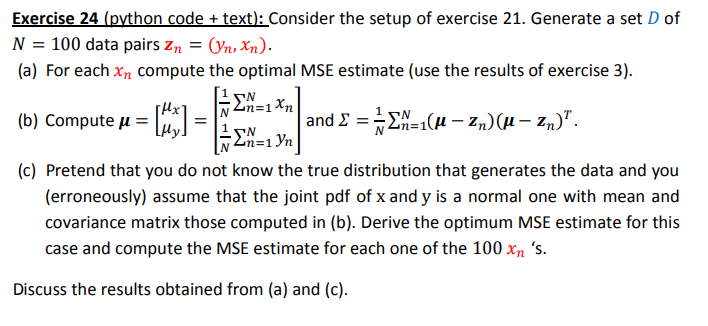

MSE for Optimal MSE Estimate: 10.491983457794731
MSE for Expected Value Estimate: 0.055783198966685814


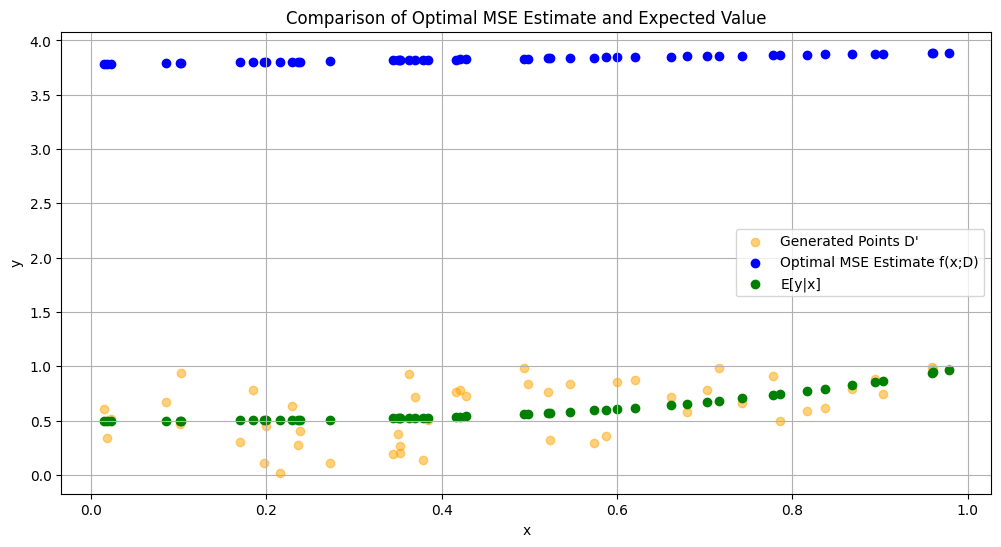

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step (a): Generate a single dataset D of 100 pairs (y_n, x_n)
def generate_data(num_samples):
    x = np.random.uniform(0, 1, num_samples)  # Uniform distribution for x
    y = np.random.uniform(x**3, 1, num_samples)  # y in (x^3, 1)
    return x, y

# Generate dataset D
D_x, D_y = generate_data(100)

# Step (b): Define the optimal MSE estimate for g(x) based on Exercise 3 results
mu_y, mu_x = 4, 2
sigma_x2, sigma_yx, sigma_y2 = 9, 1, 4

# Optimal MSE estimate function for E[y|x] using the Gaussian assumptions from Exercise 3
def optimal_mse_estimate(x):
    return mu_y + (sigma_yx / sigma_x2) * (x - mu_x)

# Compute the optimal MSE estimate for each x in D
D_estimates = optimal_mse_estimate(D_x)

# Step (c): Generate randomly a set D’ of additional 50 points
D_prime_x, D_prime_y = generate_data(50)

# Compute optimal MSE estimates for D’ using the optimal MSE function
D_prime_estimates = optimal_mse_estimate(D_prime_x)

# Step (d): Calculate the associated estimates E[y|x] directly
def expected_value_y_given_x(x):
    return (1 + x**3) / 2

# Compute E[y|x] for D’ x values
E_y_given_x = expected_value_y_given_x(D_prime_x)

# Step (e): Quantify the performance using MSE
mse_optimal = np.mean((D_prime_y - D_prime_estimates) ** 2)
mse_expected = np.mean((D_prime_y - E_y_given_x) ** 2)

# Output MSE results
print(f'MSE for Optimal MSE Estimate: {mse_optimal}')
print(f'MSE for Expected Value Estimate: {mse_expected}')

# Plotting results
plt.figure(figsize=(12, 6))  
plt.scatter(D_prime_x, D_prime_y, label="Generated Points D'", color='orange', alpha=0.5)
plt.scatter(D_prime_x, D_prime_estimates, label='Optimal MSE Estimate f(x;D)', color='blue')
plt.scatter(D_prime_x, E_y_given_x, label='E[y|x]', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Optimal MSE Estimate and Expected Value')
plt.legend()
plt.grid()
plt.show()
